In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time
import tensorflow as tf
from tensorflow import keras

In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

170498071/170498071 [==============================] - 6s 0us/step


In [3]:
print(f"train size : {len(x_train)}")
print(f"test size : {len(x_test)}")
print(f"num of classes : {len(np.unique(y_train))}")

train size : 50000
test size : 10000
num of classes : 10


In [4]:
print(f"shape of each sample {x_train[0].shape}")

shape of each sample (32, 32, 3)


label is : [1]


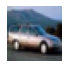

In [5]:
plt.figure(figsize=(1,1))
plt.imshow(x_train[4])
plt.axis("off")
print(f"label is : {y_train[4]}")

In [6]:
# Number of images belonging to each data set
class_count = {}
for sample in y_train:
    if sample[0] not in class_count:
        class_count[sample[0]] = 0
    class_count[sample[0]] += 1
class_count

{6: 5000,
 9: 5000,
 4: 5000,
 1: 5000,
 2: 5000,
 7: 5000,
 8: 5000,
 3: 5000,
 5: 5000,
 0: 5000}

In [7]:
np.random.seed(43)
val_size = 5000
train_size = len(x_train) - val_size

In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [9]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    zoom_range=0.3,
    horizontal_flip=True,
    vertical_flip=False,
    validation_split=val_size/len(x_train),
)
test_datagen = ImageDataGenerator(rescale=1./255)

In [10]:
from tensorflow.keras.utils import to_categorical
y_train_categorical = to_categorical(y_train, num_classes=10)
y_test_categorical = to_categorical(y_test, num_classes=10)

In [11]:
train_set = train_datagen.flow(
    x_train,
    y_train_categorical,
    batch_size=128,
)

test_set = test_datagen.flow(
    x_test,
    y_test_categorical,
    batch_size=128,
)

In [12]:
print(train_set[0][0].shape)

(128, 32, 32, 3)


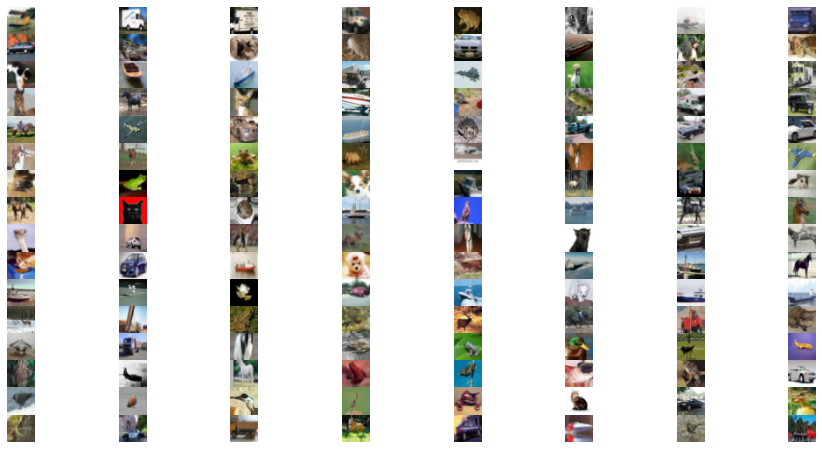

In [13]:
f, axarr = plt.subplots(16,8, figsize=(16, 8))
for i in range(16):
  for j in range(8):
    curr_image = 8 * i + j
    axarr[i,j].imshow(train_set[0][0][curr_image])
    axarr[i,j].axis("off")
plt.subplots_adjust(wspace=0, hspace=0)

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras import activations
from keras.layers import PReLU


In [15]:
data_shape = train_set[0][0][0].shape
model_mlp = Sequential()
# Input Layer
model_mlp.add(layers.Input(shape=data_shape))
model_mlp.add(layers.Flatten())

# Hidden Layer
model_mlp.add(layers.Dense(256))
model_mlp.add(PReLU())

model_mlp.add(layers.Dense(128))
model_mlp.add(PReLU())

model_mlp.add(layers.Dense(64))
model_mlp.add(PReLU())

# Output Layer
model_mlp.add(layers.Dense(len(np.unique(y_train))))
model_mlp.add(layers.Activation('softmax'))

In [16]:
model_mlp.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense (Dense)               (None, 256)               786688    
                                                                 
 p_re_lu (PReLU)             (None, 256)               256       
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 p_re_lu_1 (PReLU)           (None, 128)               128       
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 p_re_lu_2 (PReLU)           (None, 64)                6

In [17]:
class CustomCallback(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs=None):
        print("Epoch [{}], val_loss: {:.4f}, val_accuracy: {:.4f}".format(epoch, logs['val_loss'], logs['val_accuracy']))


loss = 'categorical_crossentropy'

training_params = [
    (2, 1e-2),
    (2, 1e-3),
    (2, 1e-4),
    (2, 1e-5),
    (2, 5e-6)
]

histories_mlp = {"loss" : [] , "accuracy" : []}
my_callbacks = [
    CustomCallback(),
]

for epochs, learning_rate in training_params:
  print(f"training for {epochs} epochs and learning rate {learning_rate}")
  opt = keras.optimizers.Adam(learning_rate=learning_rate)
  model_mlp.compile(
    loss=loss,
    optimizer=opt,
    metrics=['accuracy'],
  )
  fitted_model = model_mlp.fit(
    x=train_set,
    epochs=epochs,
    validation_data=train_set,
    # callbacks=my_callbacks
  )
  histories_mlp["loss"] += fitted_model.history["val_loss"]
  histories_mlp["accuracy"] += fitted_model.history["val_accuracy"] 
  print(fitted_model.history)




training for 2 epochs and learning rate 0.01
Epoch 1/2
391/391 [==============================] - 60s 145ms/step - loss: 2.5430 - accuracy: 0.2357 - val_loss: 1.9986 - val_accuracy: 0.2766
Epoch 2/2
391/391 [==============================] - 57s 146ms/step - loss: 1.8686 - accuracy: 0.3244 - val_loss: 1.8077 - val_accuracy: 0.3474
{'loss': [2.5430493354797363, 1.8685730695724487], 'accuracy': [0.23569999635219574, 0.3244200050830841], 'val_loss': [1.9985815286636353, 1.8076684474945068], 'val_accuracy': [0.2766000032424927, 0.34738001227378845]}
training for 2 epochs and learning rate 0.001
Epoch 1/2
391/391 [==============================] - 59s 150ms/step - loss: 1.7291 - accuracy: 0.3816 - val_loss: 1.7083 - val_accuracy: 0.3867
Epoch 2/2
391/391 [==============================] - 58s 149ms/step - loss: 1.6858 - accuracy: 0.3940 - val_loss: 1.6718 - val_accuracy: 0.4010
{'loss': [1.7290531396865845, 1.6858470439910889], 'accuracy': [0.38155999779701233, 0.3940199911594391], 'val_los

In [18]:
def creating_plot(title, values):
    plt.plot(values, '-x')
    plt.xlabel('epoch')
    plt.ylabel(title)
    plt.title(f'{title} vs. No. of epochs')

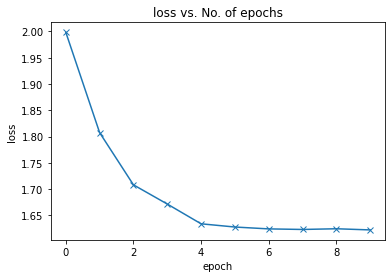

In [19]:
creating_plot("loss", histories_mlp["loss"])

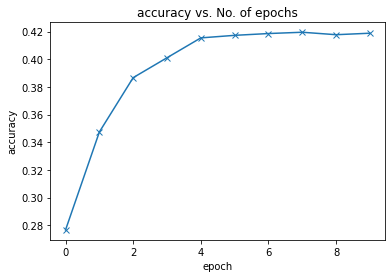

In [20]:
creating_plot("accuracy", histories_mlp["accuracy"])

In [21]:
model_mlp.evaluate(train_set)

391/391 [==============================] - 30s 76ms/step - loss: 1.6243 - accuracy: 0.4184


[1.6243140697479248, 0.4183799922466278]

In [22]:
model_mlp.evaluate(test_set)

79/79 [==============================] - 1s 13ms/step - loss: 1.5797 - accuracy: 0.4402


[1.5797250270843506, 0.44020000100135803]

In [23]:
model_cnn = keras.Sequential()
model_cnn.add(layers.Input(shape=data_shape))
model_cnn.add(keras.layers.Conv2D(32, (3, 3)))
model_cnn.add(PReLU())
model_cnn.add(keras.layers.Conv2D(64, (3, 3)))
model_cnn.add(PReLU())
model_cnn.add(keras.layers.Conv2D(128, (3, 3)))
model_cnn.add(PReLU())
model_cnn.add(keras.layers.Conv2D(128, (3, 3)))
model_cnn.add(PReLU())
model_cnn.add(keras.layers.Flatten())
model_cnn.add(keras.layers.Dense(units=10, activation='softmax'))



In [24]:
model_cnn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 p_re_lu_3 (PReLU)           (None, 30, 30, 32)        28800     
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 64)        18496     
                                                                 
 p_re_lu_4 (PReLU)           (None, 28, 28, 64)        50176     
                                                                 
 conv2d_2 (Conv2D)           (None, 26, 26, 128)       73856     
                                                                 
 p_re_lu_5 (PReLU)           (None, 26, 26, 128)       86528     
                                                                 
 conv2d_3 (Conv2D)           (None, 24, 24, 128)      

In [25]:
histories_cnn = {"loss" : [] , "accuracy" : []}
my_callbacks = [
    CustomCallback(),
]

for epochs, learning_rate in training_params:
  print(f"training for {epochs} epochs and learning rate {learning_rate}")
  opt = keras.optimizers.Adam(learning_rate=learning_rate)
  model_cnn.compile(
    loss=loss,
    optimizer=opt,
    metrics=['accuracy'],
  )
  fitted_model = model_cnn.fit(
    x=train_set,
    epochs=epochs,
    validation_data=train_set,
    # callbacks=my_callbacks
  )
  histories_cnn["loss"] += fitted_model.history["val_loss"]
  histories_cnn["accuracy"] += fitted_model.history["val_accuracy"] 
  print(fitted_model.history)

training for 2 epochs and learning rate 0.01
Epoch 1/2
391/391 [==============================] - 75s 173ms/step - loss: 2.9153 - accuracy: 0.2354 - val_loss: 1.8564 - val_accuracy: 0.3219
Epoch 2/2
391/391 [==============================] - 65s 165ms/step - loss: 1.7699 - accuracy: 0.3636 - val_loss: 1.7129 - val_accuracy: 0.3851
{'loss': [2.9153263568878174, 1.7699308395385742], 'accuracy': [0.23535999655723572, 0.36362001299858093], 'val_loss': [1.8564304113388062, 1.712880253791809], 'val_accuracy': [0.3218800127506256, 0.38514000177383423]}
training for 2 epochs and learning rate 0.001
Epoch 1/2
391/391 [==============================] - 65s 164ms/step - loss: 1.4746 - accuracy: 0.4706 - val_loss: 1.4078 - val_accuracy: 0.4945
Epoch 2/2
391/391 [==============================] - 63s 162ms/step - loss: 1.3601 - accuracy: 0.5160 - val_loss: 1.2778 - val_accuracy: 0.5474
{'loss': [1.4745575189590454, 1.3600527048110962], 'accuracy': [0.4705600142478943, 0.5159599781036377], 'val_loss

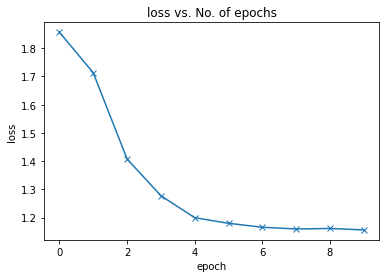

In [26]:
creating_plot("loss", histories_cnn["loss"])

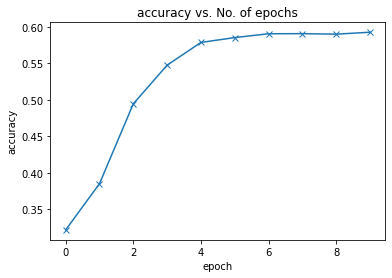

In [27]:
creating_plot("accuracy", histories_cnn["accuracy"])

In [28]:
model_cnn.evaluate(train_set)

391/391 [==============================] - 31s 80ms/step - loss: 1.1564 - accuracy: 0.5932


[1.156445026397705, 0.5932000279426575]

In [29]:
model_cnn.evaluate(test_set)

79/79 [==============================] - 2s 21ms/step - loss: 1.1378 - accuracy: 0.5935


[1.1378135681152344, 0.593500018119812]

In [30]:
model_cnn_stride = keras.Sequential()
model_cnn_stride.add(layers.Input(shape=data_shape))
model_cnn_stride.add(keras.layers.Conv2D(32, (3, 3)))
model_cnn_stride.add(PReLU())
model_cnn_stride.add(keras.layers.Conv2D(64, (3, 3), strides=(2, 2)))
model_cnn_stride.add(PReLU())
model_cnn_stride.add(keras.layers.Conv2D(128, (3, 3)))
model_cnn_stride.add(PReLU())
model_cnn_stride.add(keras.layers.Conv2D(128, (3, 3), strides=(2, 2)))
model_cnn_stride.add(PReLU())
model_cnn_stride.add(keras.layers.Flatten())
model_cnn_stride.add(keras.layers.Dense(units=10, activation='softmax'))

In [31]:
model_cnn_stride.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 p_re_lu_7 (PReLU)           (None, 30, 30, 32)        28800     
                                                                 
 conv2d_5 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 p_re_lu_8 (PReLU)           (None, 14, 14, 64)        12544     
                                                                 
 conv2d_6 (Conv2D)           (None, 12, 12, 128)       73856     
                                                                 
 p_re_lu_9 (PReLU)           (None, 12, 12, 128)       18432     
                                                                 
 conv2d_7 (Conv2D)           (None, 5, 5, 128)        

In [32]:
histories_cnn_stride = {"loss" : [] , "accuracy" : []}
my_callbacks = [
    CustomCallback(),
]

for epochs, learning_rate in training_params:
  print(f"training for {epochs} epochs and learning rate {learning_rate}")
  opt = keras.optimizers.Adam(learning_rate=learning_rate)
  model_cnn_stride.compile(
    loss=loss,
    optimizer=opt,
    metrics=['accuracy'],
  )
  fitted_model = model_cnn_stride.fit(
    x=train_set,
    epochs=epochs,
    validation_data=train_set,
    # callbacks=my_callbacks
  )
  histories_cnn_stride["loss"] += fitted_model.history["val_loss"]
  histories_cnn_stride["accuracy"] += fitted_model.history["val_accuracy"] 
  print(fitted_model.history)

training for 2 epochs and learning rate 0.01
Epoch 1/2
391/391 [==============================] - 73s 185ms/step - loss: 2.1341 - accuracy: 0.2360 - val_loss: 1.7876 - val_accuracy: 0.3361
Epoch 2/2
391/391 [==============================] - 58s 148ms/step - loss: 1.6807 - accuracy: 0.3891 - val_loss: 1.6616 - val_accuracy: 0.3929
{'loss': [2.134127616882324, 1.6807470321655273], 'accuracy': [0.23600000143051147, 0.38905999064445496], 'val_loss': [1.7876055240631104, 1.6615703105926514], 'val_accuracy': [0.33608001470565796, 0.39287999272346497]}
training for 2 epochs and learning rate 0.001
Epoch 1/2
391/391 [==============================] - 61s 154ms/step - loss: 1.4235 - accuracy: 0.4916 - val_loss: 1.3369 - val_accuracy: 0.5224
Epoch 2/2
391/391 [==============================] - 57s 146ms/step - loss: 1.3103 - accuracy: 0.5357 - val_loss: 1.2343 - val_accuracy: 0.5651
{'loss': [1.4235421419143677, 1.3103337287902832], 'accuracy': [0.49164000153541565, 0.5356600284576416], 'val_lo

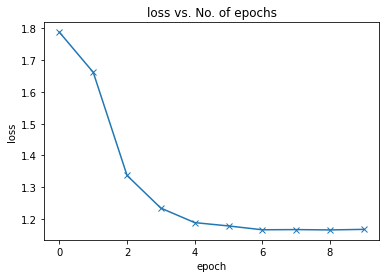

In [33]:
creating_plot("loss", histories_cnn_stride["loss"])

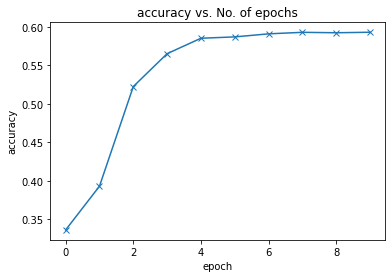

In [34]:
creating_plot("accuracy", histories_cnn_stride["accuracy"])

In [35]:
model_cnn_stride.evaluate(train_set)

391/391 [==============================] - 29s 75ms/step - loss: 1.1647 - accuracy: 0.5934


[1.1646966934204102, 0.5933600068092346]

In [36]:
model_cnn_stride.evaluate(test_set)

79/79 [==============================] - 1s 15ms/step - loss: 1.1515 - accuracy: 0.5955


[1.1514637470245361, 0.5954999923706055]

In [37]:
model_cnn_pooling = keras.Sequential()
model_cnn_pooling.add(layers.Input(shape=data_shape))
model_cnn_pooling.add(keras.layers.Conv2D(32, (3, 3)))
model_cnn_pooling.add(PReLU())
model_cnn_pooling.add(keras.layers.Conv2D(64, (3, 3)))
model_cnn_pooling.add(PReLU())
model_cnn_pooling.add(keras.layers.Conv2D(128, (3, 3)))
model_cnn_pooling.add(PReLU())
model_cnn_pooling.add(keras.layers.Conv2D(128, (3, 3)))
model_cnn_pooling.add(PReLU())
model_cnn_pooling.add(keras.layers.MaxPool2D())
model_cnn_pooling.add(keras.layers.Flatten())
model_cnn_pooling.add(keras.layers.Dense(units=10, activation='softmax'))

In [38]:
model_cnn_pooling.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 p_re_lu_11 (PReLU)          (None, 30, 30, 32)        28800     
                                                                 
 conv2d_9 (Conv2D)           (None, 28, 28, 64)        18496     
                                                                 
 p_re_lu_12 (PReLU)          (None, 28, 28, 64)        50176     
                                                                 
 conv2d_10 (Conv2D)          (None, 26, 26, 128)       73856     
                                                                 
 p_re_lu_13 (PReLU)          (None, 26, 26, 128)       86528     
                                                                 
 conv2d_11 (Conv2D)          (None, 24, 24, 128)      

In [39]:
histories_cnn_pooling = {"loss" : [] , "accuracy" : []}
my_callbacks = [
    CustomCallback(),
]

for epochs, learning_rate in training_params:
  print(f"training for {epochs} epochs and learning rate {learning_rate}")
  opt = keras.optimizers.Adam(learning_rate=learning_rate)
  model_cnn_pooling.compile(
    loss=loss,
    optimizer=opt,
    metrics=['accuracy'],
  )
  fitted_model = model_cnn_pooling.fit(
    x=train_set,
    epochs=epochs,
    validation_data=train_set,
    # callbacks=my_callbacks
  )
  histories_cnn_pooling["loss"] += fitted_model.history["val_loss"]
  histories_cnn_pooling["accuracy"] += fitted_model.history["val_accuracy"] 
  print(fitted_model.history)

training for 2 epochs and learning rate 0.01
Epoch 1/2
391/391 [==============================] - 64s 161ms/step - loss: 2.4106 - accuracy: 0.2597 - val_loss: 1.6907 - val_accuracy: 0.3873
Epoch 2/2
391/391 [==============================] - 64s 164ms/step - loss: 1.6614 - accuracy: 0.3992 - val_loss: 1.5370 - val_accuracy: 0.4466
{'loss': [2.4106247425079346, 1.6613668203353882], 'accuracy': [0.2597399950027466, 0.39917999505996704], 'val_loss': [1.6907238960266113, 1.5370056629180908], 'val_accuracy': [0.3872799873352051, 0.4465999901294708]}
training for 2 epochs and learning rate 0.001
Epoch 1/2
391/391 [==============================] - 63s 160ms/step - loss: 1.4146 - accuracy: 0.4934 - val_loss: 1.3360 - val_accuracy: 0.5184
Epoch 2/2
391/391 [==============================] - 63s 160ms/step - loss: 1.2840 - accuracy: 0.5450 - val_loss: 1.2086 - val_accuracy: 0.5681
{'loss': [1.4145615100860596, 1.2840301990509033], 'accuracy': [0.4934200048446655, 0.5450000166893005], 'val_loss'

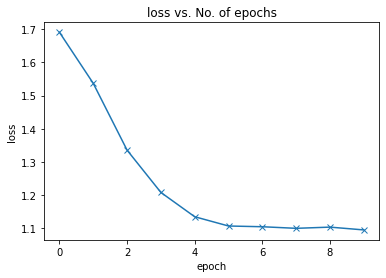

In [40]:
creating_plot("loss", histories_cnn_pooling["loss"])

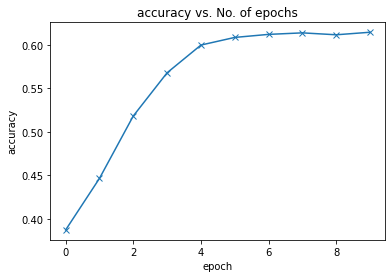

In [41]:
creating_plot("accuracy", histories_cnn_pooling["accuracy"])

In [42]:
model_cnn_pooling.evaluate(train_set)

391/391 [==============================] - 31s 80ms/step - loss: 1.0983 - accuracy: 0.6112


[1.0982898473739624, 0.6112200021743774]

In [43]:
model_cnn_pooling.evaluate(test_set)

79/79 [==============================] - 2s 22ms/step - loss: 1.0834 - accuracy: 0.6132


[1.0834167003631592, 0.6132000088691711]